In [1]:
#https://github.com/CShorten/KaggleDogBreedChallenge/blob/master/DogBreed_BinaryClassification.ipynb
import numpy as np
from keras.models import Sequential
from tensorflow.keras.datasets import mnist
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from PIL import Image
import os
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.layers. normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
DIR = './train_imgs'

def get_size_statistics():
    heights = []
    widths = []
    img_count=0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        print(path)
        data = np.array(Image.open(path))
        heights.append(data.shape[0])
        widths.append(data.shape[1])
        img_count += 1

    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))



In [3]:
get_size_statistics()

./train_imgs\apple.jpg
./train_imgs\banana.jpg
./train_imgs\orange.jpg
Average Height: 737.3333333333334
Max Height: 1198
Min Height: 335


Average Width: 829.6666666666666
Max Width: 1360
Min Width: 450


In [4]:
def label_img(name):    
    word_label = name.split('.')[0]
    if word_label == 'apple': return np.array([1, 0, 0])
    elif word_label == 'orange' : return np.array([0, 1, 0])
    elif word_label == 'banana' : return np.array([0, 0, 1])

In [14]:
IMG_SIZE=300

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        #img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
            
    #shuffle(train_data)
    return train_data

In [15]:
train_data = load_training_data()
print(np.array([i[1] for i in train_data]))
#plt.imshow(train_data[0][0], cmap = 'gist_gray')
#plt.show()
#plt.imshow(train_data[1][0], cmap = 'gist_gray')
#plt.show()
#plt.imshow(train_data[2][0], cmap = 'gist_gray')
#plt.show()

[[1 0 0]
 [0 0 1]
 [0 1 0]]


In [16]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [33]:
model=Sequential()

print(trainImages.shape)

model=Sequential()

#model.add(Dense(3,activation='relu',input_shape=(784,)))
#model.add(Dense(3,activation='relu'))
#model.add(Dense(3, activation='softmax'))

model.add(Conv2D(32, input_shape=(IMG_SIZE,IMG_SIZE,3),kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
#model.add(BatchNormalization())
model.add(Conv2D(64, input_shape=(IMG_SIZE,IMG_SIZE,3), kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(2))
#model.add(BatchNormalization())
#model.add(Conv2D(128,(3,3), padding="same", activation="relu"))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

(3, 300, 300, 3)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1080003   
Total params: 1,099,395
Trainable params: 1,099,395
Non-trainable params: 0
__________________________

Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 0s 176ms/step - loss: 75.8383 - accuracy: 0.0000e+00 - val_loss: 22341.9609 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 143ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 34794.1797 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 161ms/step - loss: 168.2402 - accuracy: 0.5000 - val_loss: 44823.5586 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 117ms/step - loss: 3714.7686 - accuracy: 0.5000 - val_loss: 43813.6641 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 111ms/step - loss: 3255.2778 - accuracy: 0.5000 - val_loss: 37541.1523 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 95ms/step - loss: 1237.4971 - accuracy: 0.5000 - val_loss: 31378.9297 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 10

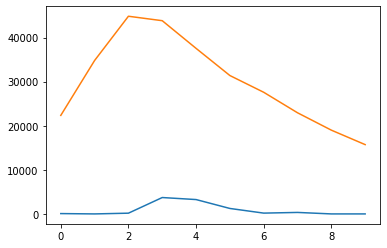

In [34]:
training=model.fit(trainImages, trainLabels, validation_split=.2, batch_size = 50, epochs = 10, verbose = 1)

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

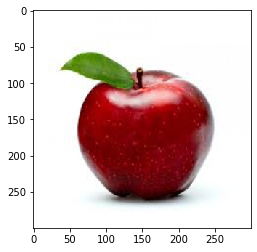

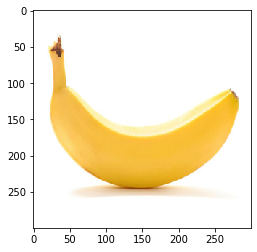

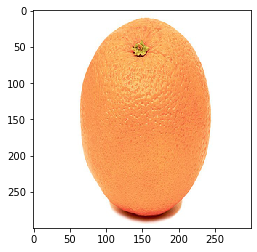

66.66666865348816
[0 2 0]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [35]:
TEST_DIR = './test_img'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        img = Image.open(path)
        #img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])
    return test_data

test_data=load_test_data()

plt.imshow(test_data[0][0], cmap = 'gist_gray')
plt.show()
plt.imshow(test_data[1][0], cmap = 'gist_gray')
plt.show()
plt.imshow(test_data[2][0], cmap = 'gist_gray')
plt.show()

testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

pred=model.predict_classes(testImages)
print(pred)

pred=model.predict(testImages)
print(pred)